In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('../Data/selected_data/merged_data.csv')
data.info()

C:\Users\kaush\AppData\Local\Temp\ipykernel_25076\1736518648.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/selected_data/merged_data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217242 entries, 0 to 217241
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           217242 non-null  int64  
 1   batter               217242 non-null  object 
 2   bowler               217242 non-null  object 
 3   non_striker          217242 non-null  object 
 4   runs_by_bat          217242 non-null  int64  
 5   extra_runs           217242 non-null  int64  
 6   total_runs_delivery  217242 non-null  int64  
 7   current_team_total   217242 non-null  int64  
 8   runs_remain          217117 non-null  float64
 9   batter_runs          217242 non-null  int64  
 10  balls_faced          217242 non-null  int64  
 11  wickets_fallen       217242 non-null  int64  
 12  delivery             217242 non-null  int64  
 13  over                 217242 non-null  int64  
 14  extra_type           217242 non-null  object 
 15  wicket_type      

In [32]:
data["won"] = data["winning_team"] == data["batting_team"]

# selecting the needed columns
columns_needed = ['match_id', 'innings', 'runs_by_bat', 'won', 'year', 'over', 'delivery']
boundary_data = data[columns_needed]

# keep only boundaries
boundary_data = boundary_data[boundary_data["runs_by_bat"].isin([4, 6])]

boundary_data.head()

,match_id,innings,runs_by_bat,won,year,over,delivery
10,Australia_Sri Lanka_2017-02-17,1,4,False,2017,1,5
16,Australia_Sri Lanka_2017-02-17,1,4,False,2017,2,5
22,Australia_Sri Lanka_2017-02-17,1,4,False,2017,3,5
26,Australia_Sri Lanka_2017-02-17,1,4,False,2017,4,3
27,Australia_Sri Lanka_2017-02-17,1,4,False,2017,4,4


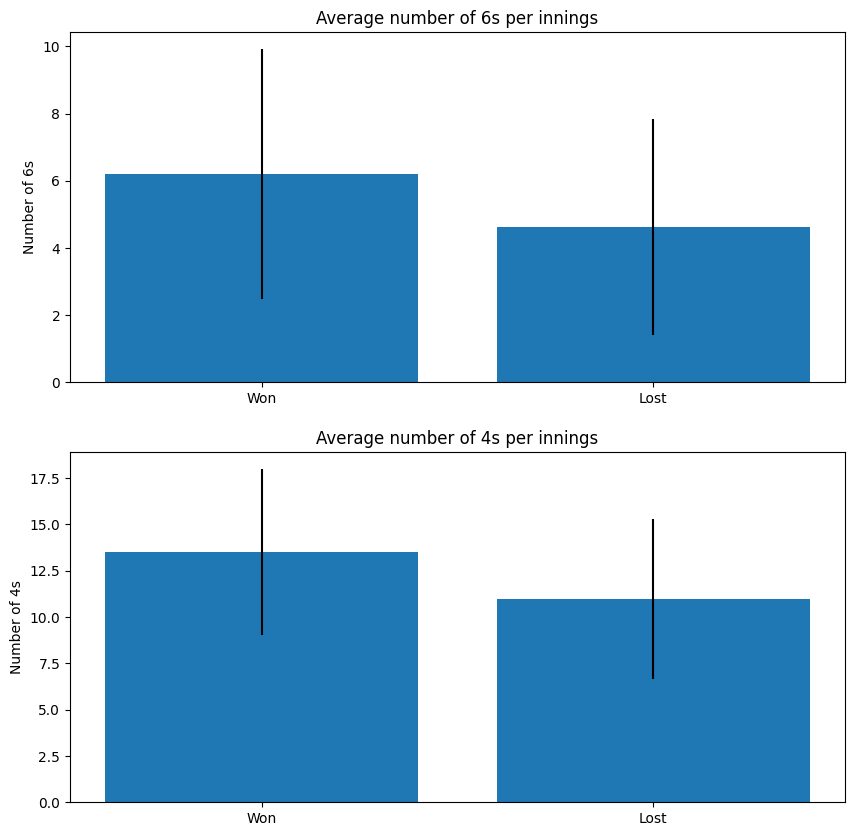

In [33]:
# calculate the number of 6s and 4s separately in each match and innings and compare with the winning team
gp = boundary_data.groupby(['match_id', 'innings', 'won'])
# get the number of 6s
sixes = gp.apply(lambda x: (x["runs_by_bat"] == 6).sum())

# average number of 6s in innings where team has won
sixes_won_mean = sixes[sixes.index.get_level_values('won')].mean()
sixes_won_std = sixes[sixes.index.get_level_values('won')].std()

sixes_lost_mean = sixes[~sixes.index.get_level_values('won')].mean()
sixes_lost_std = sixes[~sixes.index.get_level_values('won')].std()

# get the number of 4s
fours = gp.apply(lambda x: (x["runs_by_bat"] == 4).sum())
fours_won_mean = fours[fours.index.get_level_values('won')].mean()
fours_won_std = fours[fours.index.get_level_values('won')].std()

fours_lost_mean = fours[~fours.index.get_level_values('won')].mean()
fours_lost_std = fours[~fours.index.get_level_values('won')].std()

# plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].bar(["Won", "Lost"], [sixes_won_mean, sixes_lost_mean], yerr=[sixes_won_std, sixes_lost_std])
ax[0].set_title("Average number of 6s per innings")
ax[0].set_ylabel("Number of 6s")

ax[1].bar(["Won", "Lost"], [fours_won_mean, fours_lost_mean], yerr=[fours_won_std, fours_lost_std])
ax[1].set_title("Average number of 4s per innings")
ax[1].set_ylabel("Number of 4s")

plt.show()




In [17]:
# Construct a new dataframe with the number of 4s and 6s as columns, and entry for each over in each innings of a match

columns_needed = ['match_id', 'innings', 'runs_by_bat', 'won', 'year', 'over']
boundary_over_data = data[columns_needed]
# offset the over by 1 to start from 1
boundary_over_data['over'] = boundary_over_data['over'] + 1

# group by match, innings, over and calculate the number of 4s and 6s
gp = boundary_over_data.groupby(['match_id', 'innings', 'over', 'won'])
boundary_over_data = gp.apply(lambda x: pd.Series({'4s': (x["runs_by_bat"] == 4).sum(), '6s': (x["runs_by_bat"] == 6).sum()}))
boundary_over_data = boundary_over_data.reset_index()
boundary_over_data.head()



C:\Users\kaush\AppData\Local\Temp\ipykernel_25076\3322769627.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_over_data['over'] = boundary_over_data['over'] + 1


,match_id,innings,over,won,4s,6s
0,Afghanistan_Bangladesh_2018-06-03,1,1,True,2,0
1,Afghanistan_Bangladesh_2018-06-03,1,2,True,0,0
2,Afghanistan_Bangladesh_2018-06-03,1,3,True,1,0
3,Afghanistan_Bangladesh_2018-06-03,1,4,True,0,0
4,Afghanistan_Bangladesh_2018-06-03,1,5,True,2,1


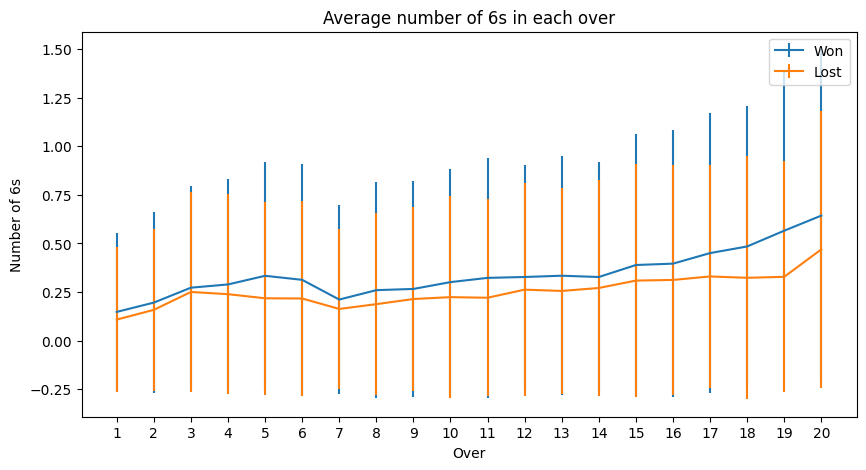

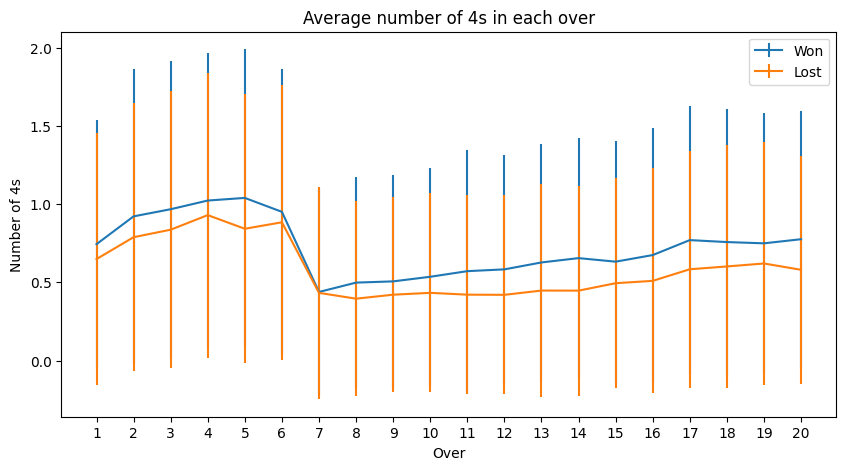

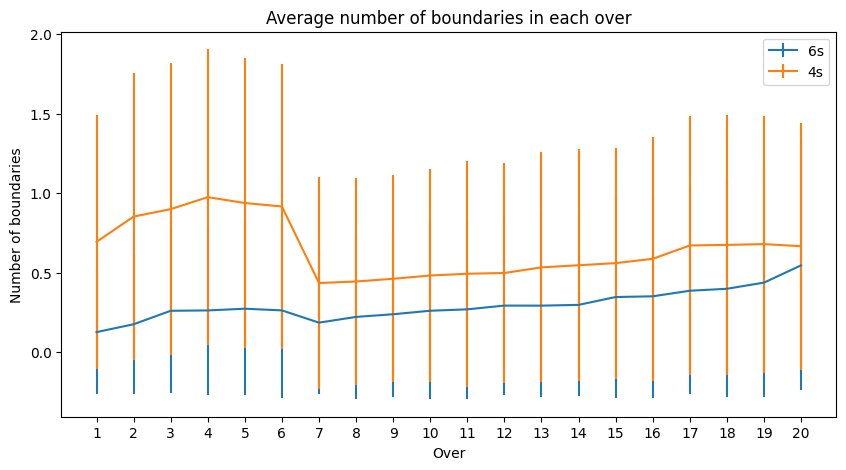

In [20]:
# calculate the average number of 4s and 6s in each over

gp = boundary_over_data.groupby(['over', 'won'])['6s']



sixes_mean = gp.mean().unstack()
sixes_std = gp.std().unstack()

gp = boundary_over_data.groupby(['over', 'won'])['4s']
fours_mean = gp.mean().unstack()
fours_std = gp.std().unstack()

plt.figure(figsize=(10, 5))
plt.errorbar(sixes_mean.index, sixes_mean[True], yerr=sixes_std[True], label="Won")
plt.errorbar(sixes_mean.index, sixes_mean[False], yerr=sixes_std[False], label="Lost")
plt.xlabel("Over")
plt.ylabel("Number of 6s")
plt.title("Average number of 6s in each over")
plt.xticks(np.arange(1, 21))
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.errorbar(fours_mean.index, fours_mean[True], yerr=fours_std[True], label="Won")
plt.errorbar(fours_mean.index, fours_mean[False], yerr=fours_std[False], label="Lost")
plt.xlabel("Over")
plt.ylabel("Number of 4s")
plt.title("Average number of 4s in each over")
plt.xticks(np.arange(1, 21))
plt.legend()
plt.show()


# combine the won and lost data into a single dataframe
gp = boundary_over_data.groupby(['over'])['6s']
sixes_mean = gp.mean()
sixes_std = gp.std()

gp = boundary_over_data.groupby(['over'])['4s']
fours_mean = gp.mean()
fours_std = gp.std()

plt.figure(figsize=(10, 5))
plt.errorbar(sixes_mean.index, sixes_mean, yerr=sixes_std, label="6s")
plt.errorbar(fours_mean.index, fours_mean, yerr=fours_std, label="4s")
plt.xlabel("Over")
plt.ylabel("Number of boundaries")
plt.title("Average number of boundaries in each over")
plt.xticks(np.arange(1, 21))
plt.legend()
plt.show()





In [23]:
# New dataframe with the number of 4s and 6s as columns, and entry for each delivery in each innings of a match
columns_needed = ['match_id', 'innings', 'runs_by_bat', 'won', 'delivery']
boundary_delivery_data = data[columns_needed]

# limit the delivery to 6 balls
boundary_delivery_data['delivery'] = np.where(boundary_delivery_data['delivery'] > 6, 6, boundary_delivery_data['delivery'])

# group by match, innings, delivery and calculate the number of 4s and 6s
gp = boundary_delivery_data.groupby(['match_id', 'innings', 'delivery', 'won'])
boundary_delivery_data = gp.apply(lambda x: pd.Series({'4s': (x["runs_by_bat"] == 4).sum(), '6s': (x["runs_by_bat"] == 6).sum()}))
boundary_delivery_data = boundary_delivery_data.reset_index()
boundary_delivery_data.head(20)

C:\Users\kaush\AppData\Local\Temp\ipykernel_25076\939961271.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_delivery_data['delivery'] = np.where(boundary_delivery_data['delivery'] > 6, 6, boundary_delivery_data['delivery'])


,match_id,innings,delivery,won,4s,6s
0,Afghanistan_Bangladesh_2018-06-03,1,1,True,1,3
1,Afghanistan_Bangladesh_2018-06-03,1,2,True,3,3
2,Afghanistan_Bangladesh_2018-06-03,1,3,True,0,0
3,Afghanistan_Bangladesh_2018-06-03,1,4,True,3,1
4,Afghanistan_Bangladesh_2018-06-03,1,5,True,1,1
5,Afghanistan_Bangladesh_2018-06-03,1,6,True,3,1
6,Afghanistan_Bangladesh_2018-06-03,2,1,False,2,0
7,Afghanistan_Bangladesh_2018-06-03,2,2,False,0,0
8,Afghanistan_Bangladesh_2018-06-03,2,3,False,3,1
9,Afghanistan_Bangladesh_2018-06-03,2,4,False,2,0


    over  delivery  6s
0      0         1  20
1      0         2  35
2      0         3  42
3      0         4  47
4      0         5  38
5      0         6  59
6      1         1  31
7      1         2  64
8      1         3  54
9      1         4  60
10     1         5  44
11     1         6  76
12     2         1  79
13     2         2  80
14     2         3  87
15     2         4  86
16     2         5  67
17     2         6  87
18     3         1  84
19     3         2  93


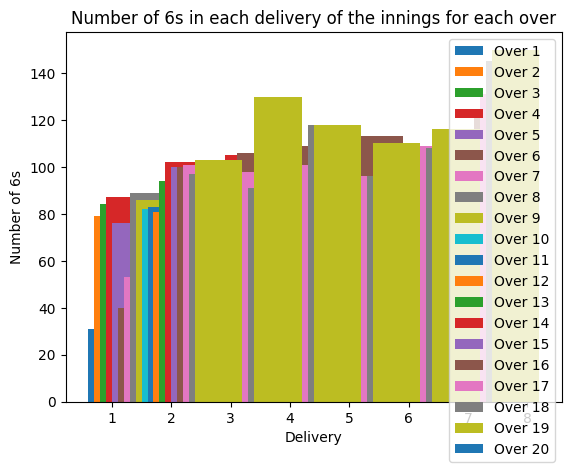

In [49]:
# Objective: Stacked bar plot showing the number of 4s and 6s in each delivery of the innings for each over
# using the boundary_data

# group by match, innings, over, delivery and calculate the number of 4s and 6s

#limit the delivery to 6 balls
boundary_data['delivery'] = np.where(boundary_data['delivery'] > 6, 6, boundary_data['delivery'])

gp = boundary_data.groupby(['over', 'delivery'])


gp = gp.apply(lambda x: pd.Series({'4s': (x["runs_by_bat"] == 4).sum(), '6s': (x["runs_by_bat"] == 6).sum()}))
gp = gp.reset_index()
print(gp[['over', 'delivery', '6s']].head(20))


gp = gp.groupby('over')

# plot sixes for each over 
# for the x axis, use "over.delivery" as the xticks
# for the y axis, use the number of 6s


